In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt





In [21]:
# importing the dataset from keras datasets
df = keras.datasets.cifar10

# spliting into train and test datasets
(train_images, train_labels), (test_images, test_labels) = df.load_data()
print('train image: ', train_images.shape)
print('test image: ', test_images.shape)

train image:  (50000, 32, 32, 3)
test image:  (10000, 32, 32, 3)


In [22]:
# class names
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#normalizing: converting from 0,255 >>> to 0, 1
train_images, test_images=train_images/255.0, test_images/255.0


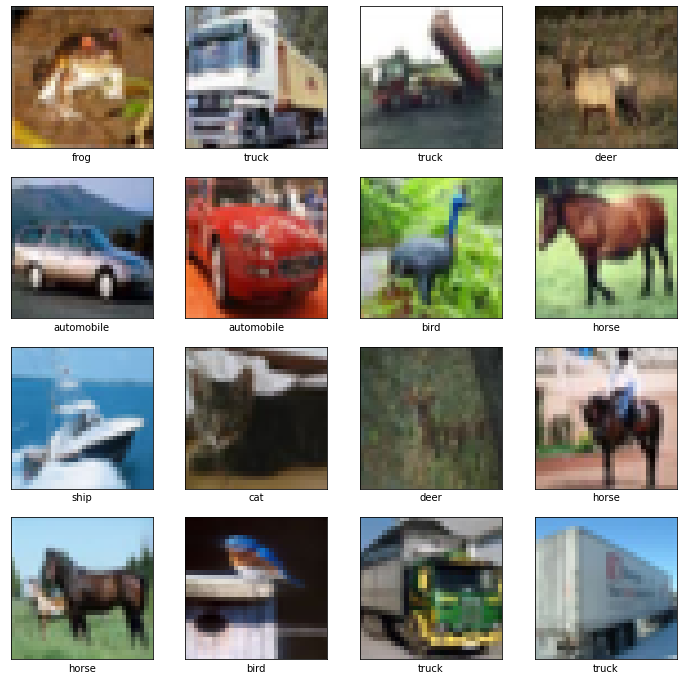

In [30]:
# to show some examples of images
def show():
    plt.figure(figsize=(12, 12))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [31]:
# Defining the model
model=keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [44]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.01)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [45]:
#training the model
batch_size = 64
epochs = 50

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
782/782 - 16s - loss: 1.0777 - accuracy: 0.6251 - 16s/epoch - 20ms/step
Epoch 2/50
782/782 - 16s - loss: 1.0139 - accuracy: 0.6480 - 16s/epoch - 20ms/step
Epoch 3/50
782/782 - 16s - loss: 0.9744 - accuracy: 0.6639 - 16s/epoch - 20ms/step
Epoch 4/50
782/782 - 16s - loss: 0.9420 - accuracy: 0.6749 - 16s/epoch - 20ms/step
Epoch 5/50
782/782 - 16s - loss: 0.9213 - accuracy: 0.6848 - 16s/epoch - 20ms/step
Epoch 6/50
782/782 - 17s - loss: 0.8922 - accuracy: 0.6937 - 17s/epoch - 21ms/step
Epoch 7/50
782/782 - 17s - loss: 0.8717 - accuracy: 0.7008 - 17s/epoch - 22ms/step
Epoch 8/50
782/782 - 17s - loss: 0.8425 - accuracy: 0.7128 - 17s/epoch - 22ms/step
Epoch 9/50
782/782 - 17s - loss: 0.8352 - accuracy: 0.7151 - 17s/epoch - 21ms/step
Epoch 10/50
782/782 - 17s - loss: 0.8386 - accuracy: 0.7143 - 17s/epoch - 21ms/step
Epoch 11/50
782/782 - 17s - loss: 0.8068 - accuracy: 0.7249 - 17s/epoch - 21ms/step
Epoch 12/50
782/782 - 16s - loss: 0.7889 - accuracy: 0.7307 - 16s/epoch - 21ms/step
E

In [48]:
#evaluating the model
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 1s - loss: 2.2715 - accuracy: 0.5836 - 545ms/epoch - 3ms/step


[2.2714951038360596, 0.5835999846458435]